In [17]:
import pandas as pd

df = pd.read_csv('/home/ajeet/code/visiontasks/annotations/V1_Labelled_data_Nov_21.csv')

unique_session_ids = df['ids'].nunique()
print("unique_session_ids", unique_session_ids)

left_out_videos = [2665250, 2633502, 2674235, 2662622, 2644411]

for video in left_out_videos:
    if video in df['ids'].unique():
        print("found")
    else:
        print("Not found")

unique_session_ids 267
found
found
found
found
found


In [1]:
import cv2

# Create a background subtractor object
backSub = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=16, detectShadows=True)

# Open a video capture object
cap = cv2.VideoCapture('/home/ajeet/Downloads/c46a9684-3926-4508-8e75-322a8c484aee_20240508170517894849.webm')  # Replace 'video.mp4' with 0 for webcam

while True:
    # Read a frame from the video
    ret, frame = cap.read()
    if not ret:
        break

    # Apply background subtraction to get the foreground mask
    fgMask = backSub.apply(frame)
    # print(fgMask)
    # Display the resulting mask
    cv2.imshow('Foreground Mask', fgMask)

    # Display the original frame with mask
    combined = cv2.bitwise_and(frame, frame, mask=fgMask)
    cv2.imshow('Original Frame with Foreground', combined)

    # Press 'q' to exit the loop
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Release the video capture object and close the windows
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

: 

In [1]:
import cv2
import numpy as np

# Initialize video capture (0 for webcam or provide video file path)
cap = cv2.VideoCapture('/home/ajeet/Downloads/istockphoto-686124430-640_adpp_is.mp4')

# Create background subtractor
backSub = cv2.createBackgroundSubtractorMOG2()

# Get frame width and height
ret, first_frame = cap.read()
if not ret:
    print("Failed to capture video.")
    cap.release()
    exit()

h, w = first_frame.shape[:2]

# Define left and right region sizes
left_start = 0
left_end = w // 8
right_start = w * 7 // 8
right_end = w

# Initialize a list to store motion detection results
motion_detected = []

count = 0
while True:
    count += 1
    # Capture the current frame
    ret, frame = cap.read()
    if not ret:
        break

    # Apply background subtraction
    fg_mask = backSub.apply(frame)

    # Apply Gaussian blur to reduce noise
    blurred_mask = cv2.GaussianBlur(fg_mask, (5, 5), 0)

    # Extract left and right regions
    mask_left = blurred_mask[:, left_start:left_end]
    mask_right = blurred_mask[:, right_start:right_end]

    # Simple thresholding for left and right masks
    min_thresh = 30  # You can adjust this threshold value
    _, thresh_left = cv2.threshold(mask_left, min_thresh, 255, cv2.THRESH_BINARY)
    _, thresh_right = cv2.threshold(mask_right, min_thresh, 255, cv2.THRESH_BINARY)

    # thresh_left = cv2.medianBlur(thresh_left, 3)
    # thresh_left = cv2.medianBlur(thresh_right, 3)
    

    # Find contours in the binary masks for left and right regions
    contours_left, _ = cv2.findContours(thresh_left, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_right, _ = cv2.findContours(thresh_right, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize motion detection flag for the current frame
    motion_detected_current_frame = False

    # Check left contours
    for contour in contours_left:
        if cv2.contourArea(contour) > 50000:  # Filter small contours
            motion_detected_current_frame = True
            break  # Exit loop once motion is detected

    # Check right contours
    if not motion_detected_current_frame:  # Only check if not already detected
        for contour in contours_right:
            if cv2.contourArea(contour) > 5000:  # Filter small contours
                motion_detected_current_frame = True
                break  # Exit loop once motion is detected

    # Append the result for the current frame to the motion_detected list
    motion_detected.append(motion_detected_current_frame)

    # Draw contours on the original frame if motion is detected
    if motion_detected_current_frame:
        for contour in contours_left:
            if cv2.contourArea(contour) > 5000:  # Filter small contours
                print(cv2.contourArea(contour))
                x, y, w, h = cv2.boundingRect(contour)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        for contour in contours_right:
            if cv2.contourArea(contour) > 50000:  # Filter small contours
                x, y, w, h = cv2.boundingRect(contour)
                cv2.rectangle(frame, (x + left_end, y), (x + left_end + w, y + h), (0, 0, 255), 2)  # Adjust x for right side

    # Display the results
    cv2.imshow('Original Frame', frame)
    cv2.imshow('Threshold Left', thresh_left)
    cv2.imshow('Threshold Right', thresh_right)

    # Exit on 'q' key press
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

# At this point, motion_detected contains True or False for each frame
print(motion_detected)

40945.0
17391.5
16975.0
17469.5
22077.5
26361.5
29221.0
31159.0
30930.0
25161.0
21754.0
21796.5
19704.0
20981.0
24114.5
28687.0
31790.0
34019.5
34512.5
36280.5
37338.0
36868.5
35417.0
16629.0
16042.0
12706.5
15403.5
10361.5
14689.0
11457.0
15024.0
10677.0
14027.5
9929.0
9628.5
9913.5
8938.0
9710.5
9190.0
7150.0
8807.0
7765.5
7607.0
7437.5
6136.5
7036.0
6812.5
5258.5
6342.5
5694.5
5232.5
5439.5
5178.0
5276.0
5110.5
7861.0
9495.0
9462.5
9838.0
9622.5
9765.5
10049.5
5473.0
11588.5
5011.5
32675.5
31207.5
31771.0
18700.0
9972.5
19919.5
7404.0
20142.5
7325.5
20811.0
12922.5
20577.5
26995.5
35048.5
36273.5
36642.5
35440.0
36987.5
34961.5
32026.5
25857.5
13693.0
7559.0
11062.0
7893.5
8662.0
8286.0
6037.0
8629.0
8604.0
6117.0
7448.0
5355.5
5308.5
10082.5
10259.0
5950.5
5748.5
5673.0
5261.5
6734.5
5203.5
8138.0
10106.0
6332.0
10726.0
6672.0
10734.0
6381.0
11321.0
5830.5
14359.0
5521.0
16106.5
7666.0
13398.5
10614.0
11170.0
15428.5
6507.0
18936.0
21127.0
12549.0
6250.5
13768.5
6079.5
13326.5
5893

In [1]:
import cv2
import numpy as np

# Load the pre-trained person detection model (e.g., SSD or YOLO)
net = cv2.dnn.readNetFromCaffe('person_det_ssd_arch.prototxt', 'VGG_VOC0712_SSD_300x300_ft_iter_120000.caffemodel')

cap = cv2.VideoCapture('/home/ajeet/testing/output_video_10s.webm')

tracker = None
tracked_person_bbox = None

backSub = cv2.createBackgroundSubtractorMOG2()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # If no tracker is initialized, detect a person
    if tracker is None:
        # Use the person detection model
        # blob = cv2.dnn.blobFromImage(frame, 0.007843, (300, 300), 127.5)
        blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0, (300, 300), (104, 117, 123))
        net.setInput(blob)
        detections = net.forward()
        print("inside ssd")

        # Loop over the detections
        for i in range(detections.shape[2]):
            confidence = detections[0, 0, i, 2]
            print(confidence)
            if confidence > 0.5:  # Confidence threshold
                # Get bounding box for the detected person
                box = detections[0, 0, i, 3:7] * np.array([frame.shape[1], frame.shape[0], frame.shape[1], frame.shape[0]])
                (startX, startY, endX, endY) = box.astype("int")
                tracked_person_bbox = (startX, startY, endX, endY)

                # Initialize the tracker with the detected bounding box
                tracker = cv2.TrackerKCF_create()  # You can use different trackers here
                tracker.init(frame, tracked_person_bbox)
                break  # Exit loop once person is detected
    else:
        # Update the tracker
        success, tracked_person_bbox = tracker.update(frame)

        # Draw the bounding box for the tracked person
        if success:
            (x, y, w, h) = [int(v) for v in tracked_person_bbox]
            # cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            scale_factor = 1.2  # Adjust this value as needed

    # Calculate the new dimensions
            new_w = int(w * scale_factor)
            new_h = int(h * scale_factor)
            
            # Calculate the new coordinates
            x = int(x - (new_w - w) / 2)  # Center the new rectangle
            y = int(y - (new_h - h) / 2)  # Center the new rectangle

            # Ensure coordinates are within frame bounds
            x = max(0, x)
            y = max(0, y)
            new_w = min(frame.shape[1] - x, new_w)
            new_h = min(frame.shape[0] - y, new_h)

            cv2.rectangle(frame, (x, y), (x + new_w, y + new_h), (0, 255, 0), 2)

            # Define the area outside of the tracked person for monitoring
            monitor_area = frame.copy()
            cv2.rectangle(monitor_area, (0, 0), (frame.shape[1], frame.shape[0]), (255, 0, 0), 2)  # Entire frame for monitoring

            # Create a mask for the area inside the tracked bounding box
            # mask = np.zeros(frame.shape[:2], dtype=np.uint8)
            # mask[y:y + h, x:x + w] = 255  # Fill the area of the tracked person
            # inverse_mask = cv2.bitwise_not(mask)  # Invert the mask for monitoring

            mask = np.zeros(frame.shape[:2], dtype=np.uint8)
            mask[y:y + new_h, x:x + new_w] = 255  # Fill the area of the tracked person
            inverse_mask = cv2.bitwise_not(mask)  # Invert the mask for monitoring

            # Apply the background subtractor to get the foreground mask
            fg_mask = backSub.apply(frame)

            # Combine the foreground mask with the inverse mask to monitor outside the tracked area
            monitored_area = cv2.bitwise_and(fg_mask, fg_mask, mask=inverse_mask)

            # Find contours in the monitored area
            contours, _ = cv2.findContours(monitored_area, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Check for detected contours to detect motion outside the tracked area
            for contour in contours:
                if cv2.contourArea(contour) > 500:  # Adjust the area threshold as needed
                    print("Motion detected outside tracked area!")
                    cv2.drawContours(frame, [contour], -1, (0, 0, 255), 2)

    # Display the results
    cv2.imshow('Frame', frame)

    # Exit on 'q' key press
    if cv2.waitKey(200) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()





error: OpenCV(4.10.0) /io/opencv/modules/dnn/src/caffe/caffe_io.cpp:1126: error: (-2:Unspecified error) FAILED: fs.is_open(). Can't open "person_det_ssd_arch.prototxt" in function 'ReadProtoFromTextFile'


In [11]:
import cv2 as cv
import numpy as np

# Apply a binary threshold
thresh_value = 127
max_value = 255
retval, binary_image = cv.threshold(image, thresh_value, max_value, cv.THRESH_BINARY)

# Display the thresholded image
cv.imshow('Binary Image', binary_image)
cv.waitKey(0)
cv.destroyAllWindows()

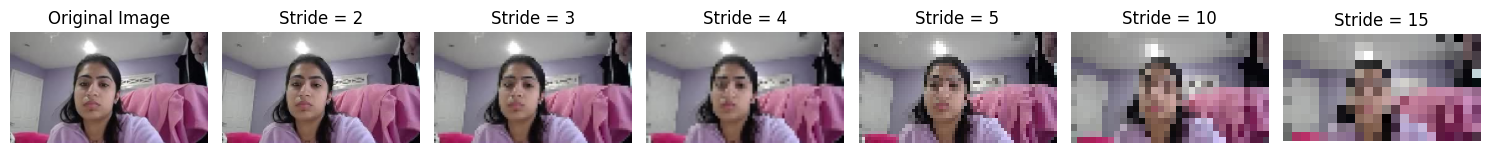

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_striding(image, stride):
    """Apply striding to the image and return the sampled pixels."""
    # Sample the image with the given stride
    sampled_pixels = image[::stride, ::stride]
    return sampled_pixels

# Load an image (replace 'image.jpg' with your image path)
image_path = '/tmp/video_incidents/2669569/0_1.jpg'  # Path to your image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Set strides
strides = [2, 3, 4, 5, 10, 15]  # Strides for the analysis

# Prepare to display images
plt.figure(figsize=(15, 5))

# Show original image
plt.subplot(1, len(strides) + 1, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Apply striding and display results
for i, stride in enumerate(strides):
    sampled_image = apply_striding(image, stride)
    plt.subplot(1, len(strides) + 1, i + 2)
    plt.imshow(sampled_image)
    plt.title(f"Stride = {stride}")
    plt.axis('off')

plt.tight_layout()
plt.show()


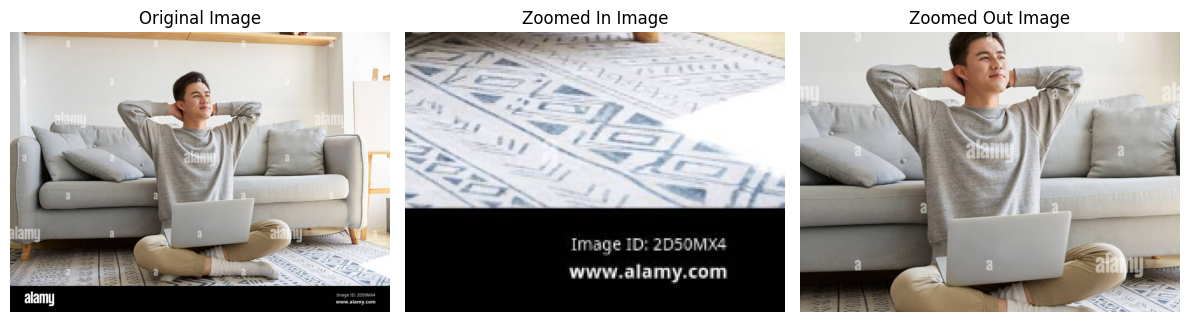

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def zoom_in(image, zoom_factor=1.5):
    height, width = image.shape[:2]
    new_height = int(height / zoom_factor)
    new_width = int(width / zoom_factor)
    
    # Resize the image
    zoomed_image = cv2.resize(image, (new_width, new_height))
    
    # Center crop to original size
    y1 = new_height // 2 - height // 2
    y2 = y1 + height
    x1 = new_width // 2 - width // 2
    x2 = x1 + width
    return zoomed_image[y1:y2, x1:x2]

def zoom_out(image, zoom_factor=1.5):
    height, width = image.shape[:2]
    new_height = int(height * zoom_factor)
    new_width = int(width * zoom_factor)
    
    # Resize the image
    zoomed_image = cv2.resize(image, (new_width, new_height))
    
    # Center crop to original size
    y1 = new_height // 2 - height // 2
    y2 = y1 + height
    x1 = new_width // 2 - width // 2
    x2 = x1 + width
    return zoomed_image[y1:y2, x1:x2]

# Load an example image
image_path = '/home/ajeet/testing/data/relax_image.jpg'  # Path to your input image
image = cv2.imread(image_path)

# Zoom in and out
zoomed_in_image = zoom_in(image, zoom_factor=1.5)
zoomed_out_image = zoom_out(image, zoom_factor=1.5)

# Display the original, zoomed in, and zoomed out images
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(zoomed_in_image, cv2.COLOR_BGR2RGB))
plt.title("Zoomed In Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(zoomed_out_image, cv2.COLOR_BGR2RGB))
plt.title("Zoomed Out Image")
plt.axis("off")

plt.tight_layout()
plt.show()


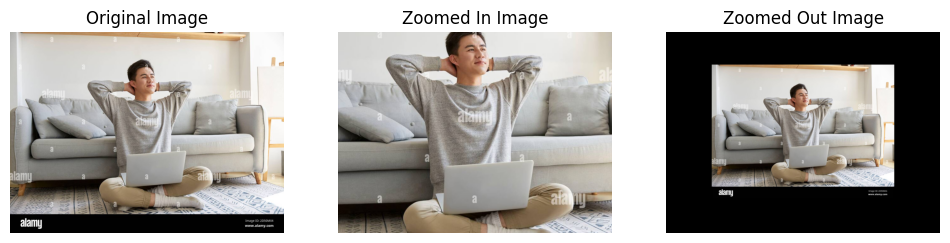

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def zoom_in(image, zoom_factor):
    # Get the dimensions of the original image
    h, w = image.shape[:2]
    
    # Calculate new dimensions
    new_h, new_w = int(h * zoom_factor), int(w * zoom_factor)
    
    # Resize the image
    zoomed_in = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_LINEAR)
    
    # Crop to the original size
    start_x = (new_w - w) // 2
    start_y = (new_h - h) // 2
    
    return zoomed_in[start_y:start_y + h, start_x:start_x + w]

def zoom_out(image, zoom_factor):
    # Get the dimensions of the original image
    h, w = image.shape[:2]
    
    # Calculate new dimensions
    new_h, new_w = int(h / zoom_factor), int(w / zoom_factor)
    
    # Resize the image
    zoomed_out = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_LINEAR)
    
    # Create a new canvas to hold the zoomed out image
    canvas = np.zeros((h, w, 3), dtype=image.dtype)
    # Calculate the center to paste the zoomed out image
    start_x = (w - new_w) // 2
    start_y = (h - new_h) // 2
    
    # Place the zoomed out image on the canvas
    canvas[start_y:start_y + new_h, start_x:start_x + new_w] = zoomed_out
    
    return canvas

# Load your image
image_path = '/home/ajeet/testing/data/relax_image.jpg'
image = cv2.imread(image_path)

# Apply zoom in and zoom out
zoomed_in_image = zoom_in(image, zoom_factor=1.5)  # Adjust zoom_factor as needed
zoomed_out_image = zoom_out(image, zoom_factor=1.5)  # Adjust zoom_factor as needed

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(zoomed_in_image, cv2.COLOR_BGR2RGB))
plt.title('Zoomed In Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(zoomed_out_image, cv2.COLOR_BGR2RGB))
plt.title('Zoomed Out Image')
plt.axis('off')

plt.show()


In [9]:
df['ids']

0       2399587
1       2399587
2       2399587
3       1325436
4       1325436
         ...   
3315     970706
3316     970706
3317     970706
3318     970706
3319     970706
Name: ids, Length: 3320, dtype: int64

In [11]:
import pandas as pd

df = pd.read_csv('/home/ajeet/codework/ujjawal_github/visionwork/annotations/Video_Labelling - Copy of sheetal_Video_Labelling.csv')

unique_session_ids = df['Session_ID'].nunique()
print(unique_session_ids)


139


In [5]:
import os
os.listdir("/home/ajeet/codework/new_yolo_testing")

['2578685',
 '2565397',
 '2602597',
 '2619480',
 '2572904',
 '2562989',
 '2529909',
 '2575985',
 '2573678']

In [7]:
import shutil
import os

# Define the list of folder names
# folders = [
#     '2547436', '2616852', '2529597', '2633803', '2578685', '2632236', '2641875', 
#     '2620429', '2571123', '2647051', '2565397', '2635100', '2665003', '2660396', 
#     '2657920', '2601175', '2629897', '2672239', '2653828', '2667606', '2602597', 
#     '2651816', '2546264', '2597081', '2642219', '2574324', '2658010', '2622665', 
#     '2619480', '2641766', '2574203', '2622932', '2573209', '2593937', '2662622', 
#     '2650632', '2647109', '2650971', '2660159', '2674235', '2628150', '2619126', 
#     '2574354', '2573666', '2575513', '2618424', '2619869', '2571769', '2635329', 
#     '2591822', '2618973', '2658305', '2620153', '2603060', '2582196', '2657809', 
#     '2626445', '2595744', '2661064', '2649897'
# ]


# folders = [
#     "2641875",
#     "2660396",
#     "2672239",
#     "2662622",
#     "2591822",
#     "2603060",
#     "2582196",
#     "2649897",
#     "2625050",
#     "2569041",
#     "2572904",
#     "2660783"
# ]

folders = [
    "2658010",
    "2650971",
    "2660783",
    "2648356",
    "2665250"
]


# Define source and destination paths
source_dir="/home/ajeet/codework/ujjawal_github/Dataset/benchmark_dataset_13_1_20"
destination_dir="/home/ajeet/codework/yolo_testing/ls_fp_reduce_3/"

# Loop over the folder names and copy each folder
for folder in folders:
    source_folder = os.path.join(source_dir, folder)
    destination_folder = os.path.join(destination_dir, folder)

    # Check if the source folder exists
    if os.path.exists(source_folder):
        try:
            # Recursively copy the folder to the destination
            shutil.copytree(source_folder, destination_folder)
            print(f"Copied: {folder}")
        except Exception as e:
            print(f"Error copying {folder}: {e}")
    else:
        print(f"Folder {folder} does not exist in the source directory.")


Copied: 2658010
Copied: 2650971
Copied: 2660783
Copied: 2648356
Copied: 2665250
